# Data Vizualization of Correlation and Causation with Linear Regression

## Using Seaborn and Pandas for vizualization 

In [1]:
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read in the data from a website in CSV format using Pandas
iris = pd.read_csv('http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv')
iris.head() # look at top 5 entries as very big file

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print(iris.info()) # print out the columns and their types and number in reries format
iris.head() # then look at the head of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


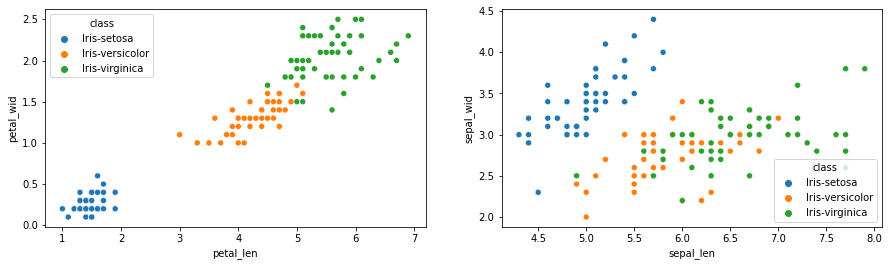

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

sns.scatterplot(x = iris['petal_len'], y = iris['petal_wid'], hue = iris['class'], ax=axs[0])
sns.scatterplot(x = iris['sepal_len'], y = iris['sepal_wid'], hue = iris['class'], ax=axs[1]);

/Users/josepabellanapuyol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


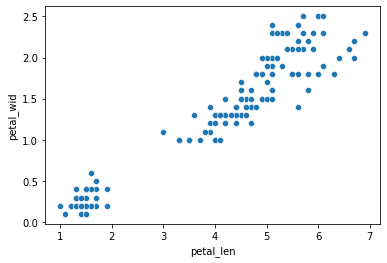

In [5]:
sns.scatterplot(iris['petal_len'], iris['petal_wid']);

In [ ]:
iris.describe()

In [ ]:
iris.info()

In [ ]:
sns.pairplot(iris)

In [ ]:
plt.figure(figsize=(10,11))
sns.heatmap(iris.corr(),annot=True)
plt.plot()

In [ ]:
# Calculate the Pearson Correlation Coefficient between all features

corr_df = iris.corr(method="pearson") 
display(corr_df)

sns.heatmap(corr_df, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values)

## Using Linear Regression to find Coefficient of Determination

In [ ]:
[col for col in iris.columns] # lets just look at the column titles

In [ ]:
#Here we can play around with what features we want
feature = ['petal_len'] # this is just one feature that we put into a list called predictors
#feature  = ['sepal_wid'] 
#feature  = ['petal_len', 'sepal_len', 'sepal_wid']

In [ ]:
label= ['petal_wid'] # this is a list for the 'target' or output of the model - the thing you are trying to predict

In [ ]:
x = iris[feature] # let's create a traiing set out of the data frame called iris which has the list pridictors as an element

In [ ]:
y = iris[label] # let's do the same for the output or target

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# this is one way of splitting up the data (both features and target) into a training set and a testing set.
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [ ]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

In [ ]:
# lets see how well the linear regression did by seeing how it scored - this uses R- squared
linreg.score(x_test, y_test)

In [ ]:
# Make predictions using the testing set
iris_y_pred = linreg.predict(x_test)

# The coefficients
print('Coefficients: \n', linreg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, iris_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, iris_y_pred))

In [ ]:
import seaborn as sns
#sns.scatterplot(iris['petal_len'], iris['sepal_wid']);
sns.scatterplot(iris['petal_len'], iris['petal_wid']);